In [37]:
# Import necessary Python libraries
# 导入必要的Python库
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Read the traffic accident dataset
# 读取交通事故数据集
df = pd.read_csv('dft-road-casualty-statistics-collision-2023.csv', low_memory=False)

# Display basic information about the dataset
# 显示数据集的基本信息
print("Dataset Information / 数据集信息:")
print(df.info())
df.head()

Dataset Information / 数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               104258 non-null  object 
 1   accident_year                                104258 non-null  int64  
 2   accident_reference                           104258 non-null  object 
 3   location_easting_osgr                        104246 non-null  float64
 4   location_northing_osgr                       104246 non-null  float64
 5   longitude                                    104246 non-null  float64
 6   latitude                                     104246 non-null  float64
 7   police_force                                 104258 non-null  int64  
 8   accident_severity                            104258 non-null  int64  
 9   number_of_vehicles            

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2023010419171,2023,010419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2023010419183,2023,010419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2023010419189,2023,010419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2023010419191,2023,010419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2023010419192,2023,010419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1


In [39]:
# Select important features for prediction
# 选取与预测相关的重要字段
selected_cols = [
    'accident_severity', 'number_of_vehicles', 'number_of_casualties',
    'date', 'time', 'day_of_week', 'road_type', 'speed_limit',
    'light_conditions', 'weather_conditions', 'road_surface_conditions',
    'urban_or_rural_area'
]

df_selected = df[selected_cols].copy()

print("Selected features / 选取后的字段：")
print(df_selected.head())

Selected features / 选取后的字段：
   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  01/01/2023   
1                  3                   3                     2  01/01/2023   
2                  3                   2                     1  01/01/2023   
3                  3                   2                     1  01/01/2023   
4                  3                   2                     1  01/01/2023   

    time  day_of_week  road_type  speed_limit  light_conditions  \
0  01:24            1          2           20                 4   
1  02:25            1          6           30                 4   
2  03:50            1          1           30                 4   
3  02:13            1          6           30                 4   
4  01:42            1          6           30                 4   

   weather_conditions  road_surface_conditions  urban_or_rural_area  
0                   8         

In [40]:
# Handle missing values
# 针对每一列进行缺失值处理
for col in df_selected.columns:
    if df_selected[col].isnull().sum() > 0:
        if df_selected[col].dtype in ['float64', 'int64']:
            df_selected[col].fillna(df_selected[col].median(), inplace=True)
        else:
            df_selected[col].fillna(df_selected[col].mode()[0], inplace=True)

print("Missing value handling completed / 缺失值处理完成。")

Missing value handling completed / 缺失值处理完成。


In [41]:
# Process date and time features
# 处理日期和时间特征
df_selected['date'] = pd.to_datetime(df_selected['date'], format='%d/%m/%Y', errors='coerce')
df_selected['month'] = df_selected['date'].dt.month
df_selected['hour'] = pd.to_datetime(df_selected['time'], format='%H:%M', errors='coerce').dt.hour

# Create time-based features
# 创建基于时间的特征
df_selected['season'] = df_selected['month'].apply(lambda x: 
    'winter' if x in [12, 1, 2] else
    'spring' if x in [3, 4, 5] else
    'summer' if x in [6, 7, 8] else
    'autumn'
)

# Create rush hour indicator
# 创建高峰时段指标
df_selected['is_rush_hour'] = df_selected['hour'].apply(lambda x: 
    1 if (x >= 7 and x <= 9) or (x >= 16 and x <= 18) else 0
)

# Create day/night indicator
# 创建白天/夜晚指标
df_selected['is_night'] = df_selected['hour'].apply(lambda x: 
    1 if x >= 20 or x <= 5 else 0
)

print("Time-based features created / 基于时间的特征创建完成！")

df_selected.head()

Time-based features created / 基于时间的特征创建完成！


,accident_severity,number_of_vehicles,number_of_casualties,date,time,day_of_week,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,month,hour,season,is_rush_hour,is_night
0,3,1,1,2023-01-01,01:24,1,2,20,4,8,2,1,1,1,winter,0,1
1,3,3,2,2023-01-01,02:25,1,6,30,4,1,1,1,1,2,winter,0,1
2,3,2,1,2023-01-01,03:50,1,1,30,4,1,1,1,1,3,winter,0,1
3,3,2,1,2023-01-01,02:13,1,6,30,4,9,1,1,1,2,winter,0,1
4,3,2,1,2023-01-01,01:42,1,6,30,4,1,1,1,1,1,winter,0,1


In [42]:
# Create interaction features
# 创建交互特征
df_selected['vehicles_casualties_ratio'] = df_selected['number_of_vehicles'] / df_selected['number_of_casualties']
df_selected['vehicles_casualties_ratio'] = df_selected['vehicles_casualties_ratio'].replace([np.inf, -np.inf], np.nan)
df_selected['vehicles_casualties_ratio'] = df_selected['vehicles_casualties_ratio'].fillna(0)

# Create road condition combinations
# 创建道路条件组合
df_selected['road_weather_condition'] = df_selected['road_surface_conditions'].astype(str) + '_' + df_selected['weather_conditions'].astype(str)
df_selected['road_light_condition'] = df_selected['road_surface_conditions'].astype(str) + '_' + df_selected['light_conditions'].astype(str)

# Create speed limit categories
# 创建速度限制类别
df_selected['speed_category'] = pd.cut(df_selected['speed_limit'], 
    bins=[0, 30, 50, 70, 100],
    labels=['low', 'medium', 'high', 'very_high']
)

# Create urban/rural with road type combination
# 创建城乡与道路类型组合
df_selected['area_road_type'] = df_selected['urban_or_rural_area'].astype(str) + '_' + df_selected['road_type'].astype(str)

print("Interaction features created / 交互特征创建完成！")

Interaction features created / 交互特征创建完成！


In [43]:
# Encode categorical features
# 对类别特征进行编码
categorical_features = [
    'road_type', 'light_conditions', 'weather_conditions', 
    'road_surface_conditions', 'urban_or_rural_area',
    'season', 'road_weather_condition', 'road_light_condition',
    'speed_category', 'area_road_type'
]
encoder = LabelEncoder()
for col in categorical_features:
    df_selected[col] = encoder.fit_transform(df_selected[col])

print("Categorical feature encoding completed / 类别特征编码完成！")

Categorical feature encoding completed / 类别特征编码完成！


In [44]:
print(df_selected['road_type'])

0         1
1         3
2         0
3         3
4         3
         ..
104253    3
104254    3
104255    3
104256    3
104257    3
Name: road_type, Length: 104258, dtype: int64


In [45]:
# Import modeling libraries
# 导入建模相关库
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Split features and target
# 特征和目标分开
X = df_selected.drop('accident_severity', axis=1)  # Input features / 输入特征
y = df_selected['accident_severity']               # Target variable / 目标变量

In [47]:
# Split dataset (70% training, 30% testing)
# 切分数据集（70%训练，30%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size / 训练集大小：", X_train.shape)
print("Test set size / 测试集大小：", X_test.shape)

Training set size / 训练集大小： (72980, 21)
Test set size / 测试集大小： (31278, 21)


In [48]:
# Initialize and train decision tree
# 初始化并训练决策树
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Decision Tree model training completed / 决策树模型训练完成！")

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [14]:
# Make predictions on test set
# 在测试集上进行预测
y_pred = model.predict(X_test)

# Evaluate model
# 评估指标输出
print("Model Accuracy / 模型准确率:", accuracy_score(y_test, y_pred))
print("\nClassification Report / 分类详细报告:\n", classification_report(y_test, y_pred))

Model Accuracy / 模型准确率: 0.6422405524649913

Classification Report / 分类详细报告:
               precision    recall  f1-score   support

           1       0.04      0.05      0.04       454
           2       0.27      0.28      0.28      7198
           3       0.77      0.76      0.77     23626

    accuracy                           0.64     31278
   macro avg       0.36      0.36      0.36     31278
weighted avg       0.65      0.64      0.65     31278



/Users/ivedha/Documents/programming/University/Data Science with ML/comp4030-accident-analysis/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ivedha/Documents/programming/University/Data Science with ML/comp4030-accident-analysis/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ivedha/Documents/programming/University/Data Science with ML/comp4030-accident-analysis/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20005 (\N{CJK UNIFIED IDEOGRAPH-4E25}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ivedha/Documents/programming/University/Data Science with ML/comp4030-accident-analysis/venv/lib/python3.13/

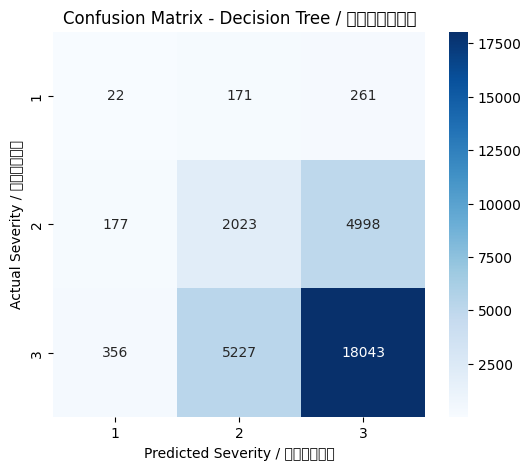

In [15]:
# Plot confusion matrix
# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel('Predicted Severity / 预测严重程度')
plt.ylabel('Actual Severity / 实际严重程度')
plt.title('Confusion Matrix - Decision Tree / 决策树混淆矩阵')
plt.show()

In [16]:
# Import Random Forest
# 导入随机森林
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize Random Forest
# 初始化随机森林
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model training completed / 随机森林模型训练完成！")

In [19]:
# Make predictions
# 在测试集上进行预测
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
# 评估指标输出
print("Random Forest Model Accuracy / 随机森林模型准确率:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report / 分类详细报告:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy / 随机森林模型准确率: 0.7163501502653622

Classification Report / 分类详细报告:
               precision    recall  f1-score   support

           1       0.05      0.01      0.02       454
           2       0.31      0.14      0.19      7198
           3       0.77      0.91      0.83     23626

    accuracy                           0.72     31278
   macro avg       0.38      0.35      0.35     31278
weighted avg       0.65      0.72      0.67     31278



In [18]:
# Plot confusion matrix
# 绘制混淆矩阵
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel('Predicted Severity / 预测严重程度')
plt.ylabel('Actual Severity / 实际严重程度')
plt.title('Confusion Matrix - Random Forest / 随机森林混淆矩阵')
plt.show() 

NameError: name 'y_pred_rf' is not defined